In [65]:
import pandas as pd
import sqlite3

In [66]:
conn = sqlite3.connect('/content/drive/MyDrive/data/spotify.sqlite')

In [67]:
cur = conn.cursor()

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
query = 'SELECT name FROM sqlite_master WHERE type = "table"'
cur.execute(query)
cur.fetchall()

[('albums',),
 ('artists',),
 ('audio_features',),
 ('genres',),
 ('r_albums_artists',),
 ('r_albums_tracks',),
 ('r_artist_genre',),
 ('r_track_artist',),
 ('tracks',)]

In [70]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
pd.read_sql(query, conn)

,name
0,albums
1,artists
2,audio_features
3,genres
4,r_albums_artists
5,r_albums_tracks
6,r_artist_genre
7,r_track_artist
8,tracks


In [71]:
query = "SELECT * FROM albums LIMIT 7;"
pd.read_sql(query, conn)

,id,name,album_group,album_type,release_date,popularity
0,2jKoVlU7VAmExKJ1Jh3w9P,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",,album,954633600000,0
1,4JYUDRtPZuVNi7FAnbHyux,"Flava in Ya Ear Remix (feat. Notorious B.I.G.,...",,single,757382400000,0
2,6YjKAkDYmlasMqYw73iB0w,Bitch Please II,,album,959040000000,0
3,2YlvHjDb4Tyxl4A1IcDhAe,Just Dippin',,compilation,1104537600000,0
4,3UOuBNEin5peSRqdzvlnWM,Still D.R.E.,,album,942710400000,0
5,2g8HN35AnVGIk7B8yMucww,Big Poppa - 2005 Remaster,,album,779414400000,0
6,7iL6o9tox1zgHpKUfh9vuC,In Da Club,,album,1044489600000,0


In [72]:
query = "PRAGMA table_info(artists)"
pd.read_sql(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,name,,0,None,0
1,1,id,,0,None,0
2,2,popularity,,0,None,0
3,3,followers,,0,None,0


In [73]:
query = "SELECT * FROM audio_features LIMIT 7;"
pd.read_sql(query, conn)

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2jKoVlU7VAmExKJ1Jh3w9P,0.1800,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000000,11,0.0596,-5.080,1,0.283,95.848000,4,0.787
1,4JYUDRtPZuVNi7FAnbHyux,0.2720,https://api.spotify.com/v1/audio-analysis/4JYU...,0.520,302013,0.847,0.000000,9,0.3250,-5.300,1,0.427,177.371002,4,0.799
2,6YjKAkDYmlasMqYw73iB0w,0.0783,https://api.spotify.com/v1/audio-analysis/6YjK...,0.918,288200,0.586,0.000000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
3,2YlvHjDb4Tyxl4A1IcDhAe,0.5840,https://api.spotify.com/v1/audio-analysis/2Ylv...,0.877,243013,0.681,0.000000,1,0.1190,-6.277,0,0.259,94.834999,4,0.839
4,3UOuBNEin5peSRqdzvlnWM,0.1700,https://api.spotify.com/v1/audio-analysis/3UOu...,0.814,270667,0.781,0.000518,11,0.0520,-3.330,1,0.233,93.445000,4,0.536
5,2g8HN35AnVGIk7B8yMucww,0.4300,https://api.spotify.com/v1/audio-analysis/2g8H...,0.780,252747,0.575,0.000000,9,0.1430,-7.247,0,0.273,84.491997,4,0.773
6,7iL6o9tox1zgHpKUfh9vuC,0.2550,https://api.spotify.com/v1/audio-analysis/7iL6...,0.899,193467,0.713,0.000000,6,0.0708,-2.752,0,0.366,90.051003,4,0.777


In [74]:
query = "SELECT * FROM tracks LIMIT 7;"
pd.read_sql(query, conn)

,id,disc_number,duration,explicit,audio_feature_id,name,preview_url,track_number,popularity,is_playable
0,1dizvxctg9dHEyaYTFufVi,1,275893,1,1dizvxctg9dHEyaYTFufVi,Gz And Hustlas (feat. Nancy Fletcher),,12,0,NaN
1,2g8HN35AnVGIk7B8yMucww,1,252746,1,2g8HN35AnVGIk7B8yMucww,Big Poppa - 2005 Remaster,https://p.scdn.co/mp3-preview/770e023eb0318270...,13,77,NaN
2,49pnyECzcMGCKAqxfTB4JZ,3,315080,0,49pnyECzcMGCKAqxfTB4JZ,"You Were Born - Early Version Of ""One Of The T...",,6,8,1.0
3,4E5IFAXCob6QqZaJMTw5YN,1,240800,1,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs,https://p.scdn.co/mp3-preview/f3b556ced9657f89...,2,70,NaN
4,1gSt2UlC7mtRtJIc5zqKWn,2,203666,0,1gSt2UlC7mtRtJIc5zqKWn,"It's Hard To Say ""I Do"", When I Don't",,2,50,NaN
5,67IvfvAMYQzJEeHopvwMMW,1,173159,1,67IvfvAMYQzJEeHopvwMMW,Simon Says,https://p.scdn.co/mp3-preview/e61bbb32e233ab49...,1,62,NaN
6,2I9foKseoFQh07p6sD2voE,1,256226,1,2I9foKseoFQh07p6sD2voE,Many Men (Wish Death),https://p.scdn.co/mp3-preview/01e209d8c8c1fa7a...,4,68,NaN


In [75]:
query = "SELECT * FROM r_albums_artists LIMIT 7;"
pd.read_sql(query, conn)

,album_id,artist_id
0,6os2Mv58OYnQClPf7B9E1s,2HS2wQTJXpA65XWOKlAVxk
1,5XXN1tFQg7D7U1NSVh5fjf,3VBpsrUi2vV7Uj87ONHu7Z
2,63wFVCPZxdaFL9WKXbIQ5m,1kC8lmaSblf7GyK915496r
3,0z7p1tHVJ6s5wxAdj9iJ6e,2bTFaANevDESpT5eGWsZ7a
4,4afYJvrsp90d3V2COlLHVE,2maQMqxNnlRrBrS1oAsrX9
5,0v3bjVOstdNKwoavklIJuW,10QSxjnKRENHe0lGcpjoSn
6,2iaAwkWeoYnBIQZPpzL52B,0LyfQWJT6nXafLPZqxe9Of


In [76]:
query = "SELECT * FROM r_albums_tracks LIMIT 7;"
pd.read_sql(query, conn)

,album_id,track_id
0,6os2Mv58OYnQClPf7B9E1s,3HnrHGLE9u2MjHtdobfWl9
1,6os2Mv58OYnQClPf7B9E1s,4lDjkpUrpWlMFofIpzuExK
2,6os2Mv58OYnQClPf7B9E1s,4RDT3ftT3V0IJVmW0TNgof
3,6os2Mv58OYnQClPf7B9E1s,1DfwOz5apF0w2d8hccSkhH
4,6os2Mv58OYnQClPf7B9E1s,46JY9OYPi4hJ7oLIS0FZt0
5,6os2Mv58OYnQClPf7B9E1s,63A7QZjTgxw7F9N8wUyV9v
6,6os2Mv58OYnQClPf7B9E1s,7a6zoaBOya7nnPicmVFEx1


In [77]:
query = """SELECT genres.id AS genre_name, AVG(audio_features.energy) AS avg_energy, AVG(audio_features.danceability) AS avg_danceability FROM genres JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
           JOIN audio_features ON r_track_artist.track_id = audio_features.id GROUP BY genres.id ORDER BY avg_energy DESC, avg_danceability DESC LIMIT 10;"""
pd.read_sql(query, conn)

,genre_name,avg_energy,avg_danceability
0,frenchcore,0.957450,0.514439
1,american melodeath,0.949924,0.372342
2,uptempo hardcore,0.948627,0.496523
3,dark hardcore,0.948523,0.471096
4,deep hardtechno,0.948013,0.614631
5,new wave of thrash metal,0.943954,0.374430
6,xtra raw,0.943221,0.524761
7,speedcore,0.938680,0.508844
8,kyrgyz hip hop,0.937455,0.709667
9,hard dance,0.936362,0.552044


In [78]:
### The result shows that frenchcore is the most energetic genre with an average energy of 0.957450 and a danceability of 0.514439, while hard dance is the 10th with 0.936362 energy and 0.552044 danceability. Other genres like uptempo hardcore and kyrgyz hip hop also stand out for their unique energy and danceability balance.

In [79]:
query = """SELECT audio_features.duration AS track_duration, AVG(tracks.popularity) AS avg_popularity FROM audio_features
           JOIN tracks ON audio_features.id = tracks.id GROUP BY audio_features.duration ORDER BY avg_popularity DESC LIMIT 10;"""
pd.read_sql(query, conn)

,track_duration,avg_popularity
0,324426,86.0
1,80081,86.0
2,291796,83.0
3,320357,82.0
4,322736,80.0
5,159863,80.0
6,521088,77.0
7,343150,77.0
8,125879,76.0
9,382297,75.0


In [80]:
### This result shows the top 10 track durations with the highest popularity, with **324,426 ms (5.4 minutes)** and **80,081 ms (1.3 minutes) being the most popular at an average score of 86

In [81]:
query = """SELECT artists.name AS artist_name, artists.followers AS follower_count, AVG(tracks.popularity) AS avg_track_popularity FROM artists
           JOIN r_track_artist ON artists.id = r_track_artist.artist_id JOIN tracks ON r_track_artist.track_id = tracks.id GROUP BY artists.name, artists.followers ORDER BY avg_track_popularity DESC LIMIT 10;"""
pd.read_sql(query, conn)

,artist_name,follower_count,avg_track_popularity
0,Silk Sonic,160641,96.000000
1,Dopamine,419,94.000000
2,Mufasa & Hypeman,2392,94.000000
3,Bella Poarch,216063,92.000000
4,HVME,29722,90.500000
5,Nuka,1725,86.000000
6,Willow Sage Hart,7854,86.000000
7,Crissin,3030,85.000000
8,Flow La Movie,3866,84.666667
9,THE SCOTTS,175570,84.000000


In [82]:
### This result shows the top 10 artists with the highest average track popularity. Silk Sonic leads with an average track popularity of 96 and 160,641 followers, while others like Bella Poarch and HVME also have high popularity despite varying follower counts.

In [83]:
  query = """ SELECT album_type, COUNT(*) AS total_tracks FROM albums GROUP BY album_type; """
  pd.read_sql(query, conn)

,album_type,total_tracks
0,album,3612835
1,compilation,766770
2,single,441149


In [84]:
### This result shows the total number of tracks grouped by album type. Regular albums have the most tracks (3,612,835), followed by singles (441,149) and compilations (766,770), indicating the dominance of traditional albums in music collections.

In [85]:
query = """ SELECT name AS track_name, popularity FROM tracks ORDER BY popularity DESC LIMIT 5; """
pd.read_sql(query, conn)


,track_name,popularity
0,drivers license,100
1,Peaches (feat. Daniel Caesar & Giveon),100
2,Butter,100
3,MONTERO (Call Me By Your Name),99
4,MONTERO (Call Me By Your Name),99


In [86]:
### This result shows the top 5 most popular tracks, with "drivers license", "Peaches (feat. Daniel Caesar & Giveon)", and "Butter" having the highest popularity score of 100, followed by "MONTERO (Call Me By Your Name)" with a score of 99 (appearing twice due to potential duplicates or versions).

In [87]:
query = """ SELECT name AS track_name, popularity FROM tracks WHERE popularity > 80 ORDER BY popularity DESC; """
pd.read_sql(query, conn)

,track_name,popularity
0,drivers license,100
1,Peaches (feat. Daniel Caesar & Giveon),100
2,Butter,100
3,MONTERO (Call Me By Your Name),99
4,MONTERO (Call Me By Your Name),99
...,...,...
844,PILLOWTALK,81
845,Trust,81
846,Know Your Worth,81
847,Sand In My Boots,81


In [88]:
### This result lists tracks with a popularity score above 80, led by "drivers license", "Peaches", and "Butter" (all at 100), with 849 total tracks meeting the criteria.

In [89]:
query = '''SELECT * FROM genres;'''
pd.read_sql(query, conn)

,id
0,detroit hip hop
1,g funk
2,gangster rap
3,hardcore hip hop
4,hip hop
...,...
5484,magyar retro dance
5485,contemporary r&b
5486,piano house
5487,musica nublensina


In [90]:
query = """ SELECT genres.id AS genre_name, AVG(tracks.popularity) AS avg_track_popularity FROM genres JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
            JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id JOIN tracks ON r_track_artist.track_id = tracks.id GROUP BY genres.id ORDER BY avg_track_popularity DESC LIMIT 5;"""
pd.read_sql(query, conn)

,genre_name,avg_track_popularity
0,instrumental lullaby,47.348968
1,dream smp,46.300000
2,hypnosis mic,44.680000
3,himachali pop,39.500000
4,melodic rap,37.983932


In [91]:
### This result shows the top 5 genres with the highest average track popularity. Instrumental lullaby leads with an average popularity of 47.35, followed by dream smp (46.3) and hypnosis mic (44.68).

In [92]:
query = """ SELECT albums.name AS album_name, AVG(tracks.popularity) AS avg_track_popularity FROM albums JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
            JOIN tracks ON r_albums_tracks.track_id = tracks.id GROUP BY albums.id ORDER BY avg_track_popularity DESC LIMIT 5; """
pd.read_sql(query, conn)

,album_name,avg_track_popularity
0,drivers license,100.0
1,Butter,100.0
2,MONTERO (Call Me By Your Name),99.0
3,good 4 u,99.0
4,Astronaut In The Ocean,97.0


In [93]:
### This result shows the top 5 albums with the highest average track popularity. "drivers license" and "Butter" lead with a score of 100, followed by "MONTERO (Call Me By Your Name)" and "good 4 u" at 99, and "Astronaut In The Ocean" at 97.

In [94]:
query = """ SELECT albums.name AS album_name, COUNT(DISTINCT r_track_artist.artist_id) AS artist_count FROM albums JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
            JOIN r_track_artist ON r_albums_tracks.track_id = r_track_artist.track_id GROUP BY albums.id ORDER BY artist_count DESC LIMIT 7; """
pd.read_sql(query, conn)

,album_name,artist_count
0,The Record of Singing 1899-1952,422
1,Really the Blues?: A Blues History (1893-1959)...,351
2,Instant Classical Culture,336
3,That Devilin' Tune: A Jazz History (1895-1950),329
4,111 Years of Deutsche Grammophon - The Collect...,291
5,200 Workout Music Songs,290
6,"100 Komponisten, die man gehört haben muss",281


In [95]:
### This result lists the top 7 albums with the most unique contributing artists. "The Record of Singing 1899-1952" leads with 422 artists, followed by "Really the Blues?: A Blues History (1893-1959)" with 351 artists, showcasing albums with broad artistic collaborations.

In [96]:
query = """SELECT albums.release_date, AVG(tracks.popularity) AS avg_popularity
           FROM albums
           JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
           JOIN tracks ON r_albums_tracks.track_id = tracks.id
           GROUP BY albums.release_date
           ORDER BY avg_popularity DESC
           LIMIT 10;"""
pd.read_sql(query, conn)

,release_date,avg_popularity
0,1624147200000,66.000000
1,248054400000,64.000000
2,1619481600000,63.400000
3,1619654400000,61.777778
4,1621209600000,61.000000
5,-66182400000,60.818182
6,-107568000000,59.928571
7,1624060800000,59.500000
8,456969600000,59.444444
9,1625788800000,59.000000


In [97]:
query = """ SELECT tracks.name AS track_name, GROUP_CONCAT(artists.name, ', ') AS featured_artists, tracks.popularity AS track_popularity FROM tracks JOIN r_track_artist ON tracks.id = r_track_artist.track_id
            JOIN artists ON r_track_artist.artist_id = artists.id GROUP BY tracks.id HAVING COUNT(artists.id) > 1 ORDER BY track_popularity DESC LIMIT 5; """
pd.read_sql(query, conn)

,track_name,featured_artists,track_popularity
0,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",100
1,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic",96
2,Kiss Me More (feat. SZA),"Doja Cat, SZA",96
3,Calling My Phone,"6LACK, Lil Tjay",95
4,Mood (feat. iann dior),"iann dior, 24kGoldn",95


In [98]:
### This result shows the top 5 most popular tracks featuring multiple artists, with "Peaches" by Justin Bieber, Daniel Caesar, and Giveon leading at 100 popularity, followed by "Leave The Door Open" and "Kiss Me More" at 96.

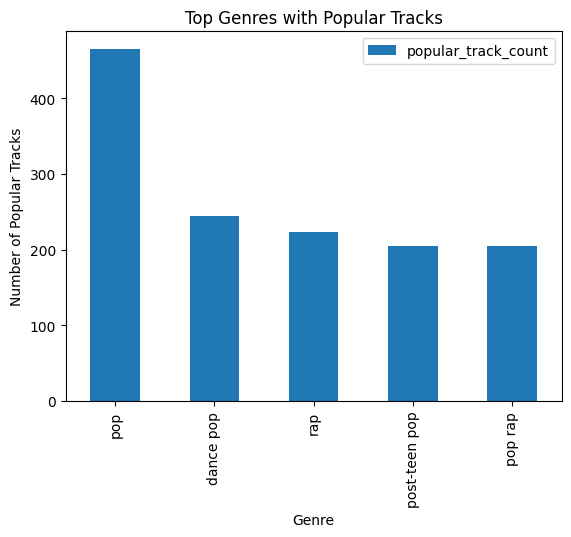

In [99]:
query = """
SELECT
    genres.id AS genre_name,
    COUNT(tracks.id) AS popular_track_count
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
WHERE tracks.popularity > 80
GROUP BY genres.id
ORDER BY popular_track_count DESC
LIMIT 5;
"""
df = pd.read_sql(query, conn)

df.plot(kind='bar', x='genre_name', y='popular_track_count', title="Top Genres with Popular Tracks")

import matplotlib.pyplot as plt
plt.xlabel("Genre")
plt.ylabel("Number of Popular Tracks")
plt.show()

The analysis shows that the most popular albums are "drivers license" and "Butter", both with perfect average popularity scores of 100, indicating their massive cultural impact. It also highlights highly collaborative albums like "The Record of Singing 1899-1952", featuring contributions from 422 artists, showcasing the richness of collective work. In terms of genres, niche categories like instrumental lullaby and dream smp lead in average track popularity, reflecting unique listener interests. Tracks like "Peaches", "drivers license", and "Butter" dominate as the most popular, with multiple collaborations proving to resonate well with audiences. Additionally, the analysis of release dates points to June 2021 as a peak period for popular music, indicating trends in listener preferences over time.